In [13]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import importlib

# Add project root to path
sys.path.append(os.path.abspath('../../'))

import core.taa.features.price
import core.taa.features.relative
import core.taa.features.pipeline

importlib.reload(core.taa.features.price)
importlib.reload(core.taa.features.relative)
importlib.reload(core.taa.features.pipeline)

from core.taa.features.pipeline import FeaturePipeline

%matplotlib inline

## 1. Initialize Pipeline

In [14]:
tickers = ['SPY', 'XLK', 'XLE', 'XLF']
benchmark = 'ACWI'

pipeline = FeaturePipeline()

## 2. Run Pipeline

In [18]:
%%time
df_features = pipeline.run(
    tickers=tickers,
    benchmark_ticker=benchmark,
    start_date='2015-01-01',
    end_date='2024-12-31'
)

CPU times: user 266 ms, sys: 112 ms, total: 377 ms
Wall time: 696 ms


## 3. Inspect Results

In [21]:
print(f"Shape: {df_features.shape}")
display(df_features)

Shape: (10060, 16)


MOM_1W    MOM_4W   MOM_12W   MOM_52W   VOL_20D   VOL_60D  \
Date       ticker                                                               
2015-01-02 SPY          NaN       NaN       NaN       NaN       NaN       NaN   
           XLE          NaN       NaN       NaN       NaN       NaN       NaN   
           XLF          NaN       NaN       NaN       NaN       NaN       NaN   
           XLK          NaN       NaN       NaN       NaN       NaN       NaN   
2015-01-05 SPY          NaN       NaN       NaN       NaN       NaN       NaN   
...                     ...       ...       ...       ...       ...       ...   
2024-12-27 XLK     0.023180  0.027201  0.072059  0.239985  0.193264  0.188031   
2024-12-30 SPY    -0.004957 -0.020497  0.039413  0.249796  0.146551  0.128185   
           XLE     0.013303 -0.107513 -0.076481  0.039558  0.170783  0.183624   
           XLF    -0.000497 -0.055592  0.080105  0.300062  0.150656  0.188638   
           XLK    -0.004687  0.004810  0.054056  0.222759  0.197120  0.190079   

                   DIST_SMA200     RSI_14  REL_MOM_4W  REL_MOM_12W    REL_RSI  \
Date       ticker                                                               
2015-01-02 SPY             NaN        NaN         NaN          NaN        NaN   
           XLE             NaN        NaN         NaN          NaN        NaN   
           XLF             NaN        NaN         NaN          NaN        NaN   
           XLK             NaN        NaN         NaN          NaN        NaN   
2015-01-05 SPY             NaN        NaN         NaN          NaN        NaN   
...                        ...        ...         ...          ...        ...   
2024-12-27 XLK        0.082329  45.685072    0.034586     0.062983  60.778987   
2024-12-30 SPY        0.069632  38.596111    0.003519     0.036126  71.136358   
           XLE       -0.057953  21.864462   -0.085631    -0.079401  27.842381   
           XLF        0.099975  37.256765   -0.032437     0.076689  59.872806   
           XLK        0.067906  43.826549    0.029446     0.050722  62.535049   

                   BETA_60D  YIELD_CURVE_SLOPE  CREDIT_SPREAD    VIX  CPI_YOY  
Date       ticker                                                              
2015-01-02 SPY          NaN               1.46           2.51  17.79      NaN  
           XLE          NaN               1.46           2.51  17.79      NaN  
           XLF          NaN               1.46           2.51  17.79      NaN  
           XLK          NaN               1.46           2.51  17.79      NaN  
2015-01-05 SPY          NaN               1.36           2.52  19.92      NaN  
...                     ...                ...            ...    ...      ...  
2024-12-27 XLK     1.450987               0.31           1.40  15.95      0.0  
2024-12-30 SPY     1.087892               0.31           1.43  17.40      0.0  
           XLE     0.627866               0.31           1.43  17.40      0.0  
           XLF     1.001177               0.31           1.43  17.40      0.0  
           XLK     1.464936               0.31           1.43  17.40      0.0  

[10060 rows x 16 columns]

In [25]:
# Check for NaNs
df_features.isnull().sum().sort_values(ascending=False).head(10)

MOM_52W        1008
DIST_SMA200     796
MOM_12W         240
VOL_60D         240
REL_MOM_12W     240
BETA_60D        240
MOM_4W           80
VOL_20D          80
REL_MOM_4W       80
RSI_14           52
dtype: int64

In [26]:
# List all generated features
print(df_features.columns.tolist())

['MOM_1W', 'MOM_4W', 'MOM_12W', 'MOM_52W', 'VOL_20D', 'VOL_60D', 'DIST_SMA200', 'RSI_14', 'REL_MOM_4W', 'REL_MOM_12W', 'REL_RSI', 'BETA_60D', 'YIELD_CURVE_SLOPE', 'CREDIT_SPREAD', 'VIX', 'CPI_YOY']


## 4. Visualization

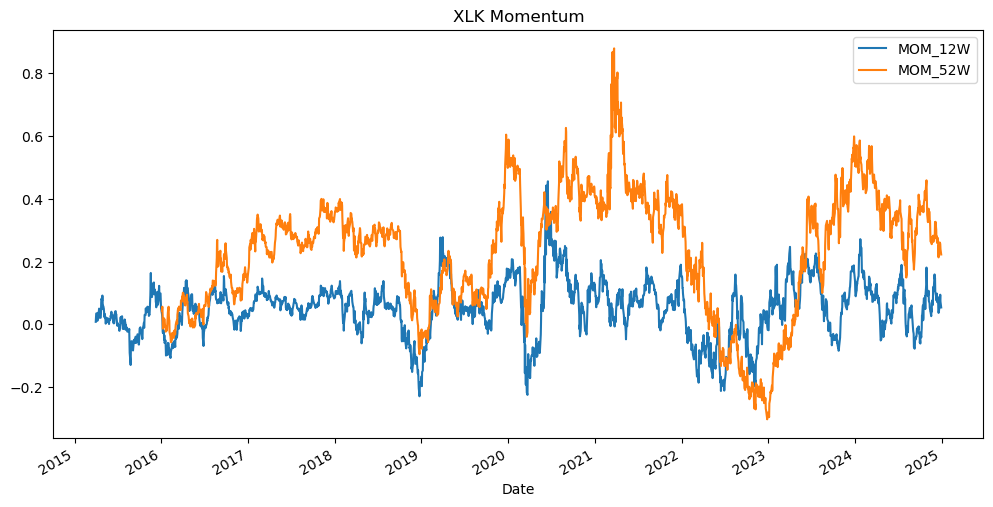

In [28]:
# Plot Momentum for XLK
ticker = 'XLK'
cols = ['MOM_12W', 'MOM_52W']

if all(c in df_features.columns for c in cols):
    df_features.xs(ticker, level='ticker')[cols].plot(figsize=(12, 6), title=f'{ticker} Momentum')
else:
    print(f"Columns {cols} not found")

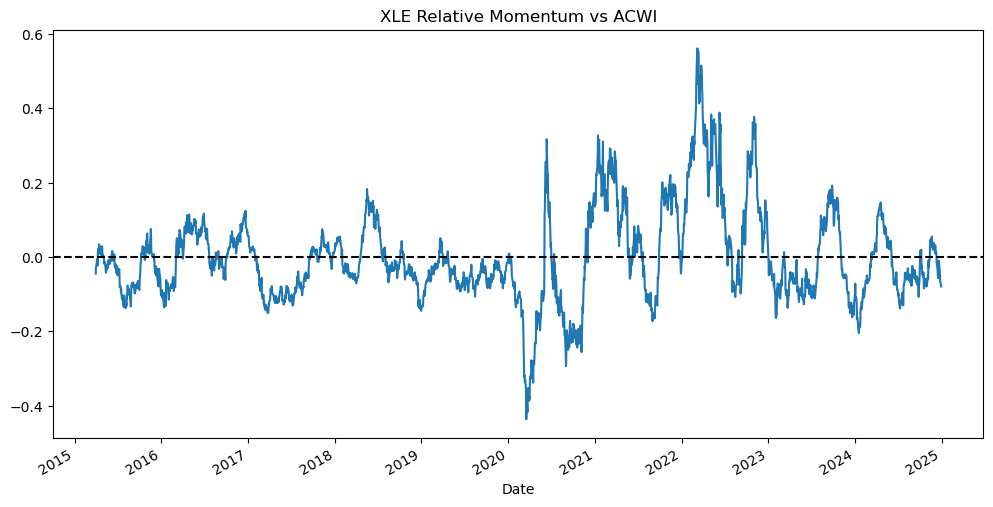

In [30]:
# Plot Relative Strength vs Benchmark
ticker = 'XLE'
col = 'REL_MOM_12W'

if col in df_features.columns:
    df_features.xs(ticker, level='ticker')[col].plot(figsize=(12, 6), title=f'{ticker} Relative Momentum vs {benchmark}')
    plt.axhline(0, color='black', linestyle='--')